**任务:**
基于task_data.csv数据，建立二阶多项式逻辑回归模型实现异常消费数据预测，与线性逻辑回归模型结果进行对比。
1、建立线性边界的逻辑回归模型，评估模型表现；
2、建立二阶多项式边界的逻辑回归模型，对比其与线性边界的表现
3、预测pay1=70, pay2=20时对应消费是否为异常消费
4、获取边界函数参数、绘制边界函数

In [1]:
#数据加载
import pandas as pd
import numpy as np
data=pd.read_csv('task_data.csv')
data.head()


,pay1,pay2,y
0,2.89,0.06,1
1,10.40,8.78,0
2,14.02,87.76,1
3,104.39,45.72,1
4,80.84,113.05,1


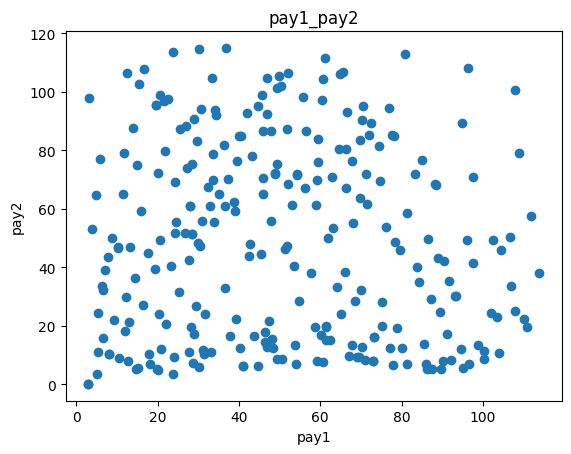

In [2]:
#数据可视化
from matplotlib import pyplot as plt
fig1=plt.figure()
plt.scatter(data.loc[:,'pay1'],data.loc[:,'pay2'])
plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.show()

In [3]:
#创建mask筛选变量
mask=data.loc[:,'y']==1
print(mask)

0       True
1      False
2       True
3       True
4       True
       ...  
268     True
269     True
270    False
271    False
272    False
Name: y, Length: 273, dtype: bool


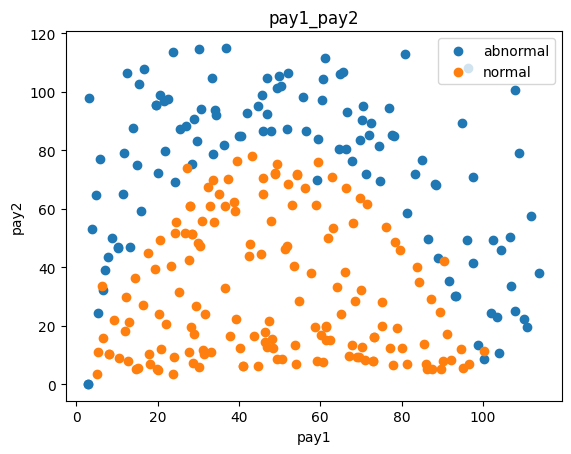

In [4]:
fig2=plt.figure()
abnormal=plt.scatter(data.loc[:,'pay1'][mask],data.loc[:,'pay2'][mask])
normal=plt.scatter(data.loc[:,'pay1'][~mask],data.loc[:,'pay2'][~mask])
plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

In [5]:
#X, y 赋值
X=data.drop(['y'],axis=1)
y=data.loc[:,'y']
X.head()
y.head()

0    1
1    0
2    1
3    1
4    1
Name: y, dtype: int64

In [6]:
#格式转化
X=np.array(X)
y=np.array(y)
print(type(X),X.shape)

<class 'numpy.ndarray'> (273, 2)


In [7]:
#建立逻辑回归模型
from sklearn.linear_model import LogisticRegression
LR1=LogisticRegression()
print(LR1)

LogisticRegression()


In [8]:
#模型训练
LR1.fit(X,y)

LogisticRegression()

In [9]:
#模型预测
y_predict=LR1.predict(X)
print(y_predict)
print(y)

[0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0
 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 1 0]
[1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0
 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0
 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1

In [10]:
#计算准确率
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y,y_predict)
print(accuracy)

0.8021978021978022


In [11]:
#获取边界函数核心参数theta
theta0=LR1.intercept_
theta1,theta2=LR1.coef_[0][0],LR1.coef_[0][1]
print(theta0,theta1,theta2)

[-4.4074176] 0.019854672255383208 0.05843952689925184


In [12]:
X1=data.loc[:,'pay1']
X1.head()

0      2.89
1     10.40
2     14.02
3    104.39
4     80.84
Name: pay1, dtype: float64

边界函数： $\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$

In [13]:
X2_new=-(theta0+theta1*X1)/theta2
print(X2_new)

0      74.436564
1      71.885062
2      70.655177
3      39.952212
4      47.953261
         ...    
268    53.379026
269    69.768436
270    68.861311
271    54.024546
272    67.125202
Name: pay1, Length: 273, dtype: float64


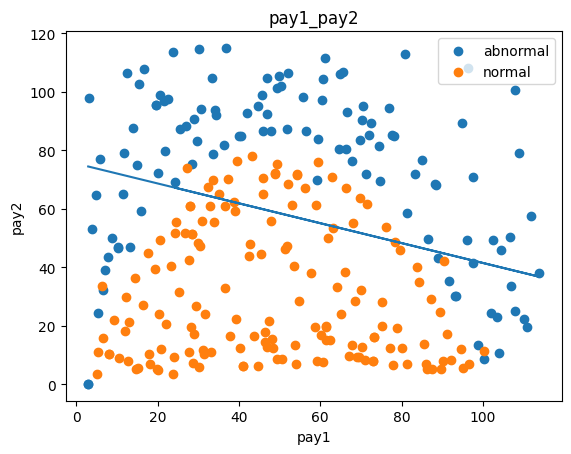

In [14]:
fig3=plt.figure()
abnormal=plt.scatter(data.loc[:,'pay1'][mask],data.loc[:,'pay2'][mask])
normal=plt.scatter(data.loc[:,'pay1'][~mask],data.loc[:,'pay2'][~mask])
plt.plot(X1,X2_new)
plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

边界函数： $\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$

二阶边界函数：$\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0$

In [15]:
X2=data.loc[:,'pay2']
#增加二阶项数据
X1_2=X1*X1
X2_2=X2*X2
X1_X2=X1*X2
print(X1[0],X2[0],X1_2[0],X2_2[0],X1_X2[0])

2.89 0.06 8.3521 0.0036 0.1734


In [16]:
#创建二阶数据样本
X_new={'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new=pd.DataFrame(X_new)
# X_new=np.array(X_new)
print(X_new)

         X1      X2        X1_2        X2_2      X1_X2
0      2.89    0.06      8.3521      0.0036     0.1734
1     10.40    8.78    108.1600     77.0884    91.3120
2     14.02   87.76    196.5604   7701.8176  1230.3952
3    104.39   45.72  10897.2721   2090.3184  4772.7108
4     80.84  113.05   6535.1056  12780.3025  9138.9620
..      ...     ...         ...         ...        ...
268   64.87  106.16   4208.1169  11269.9456  6886.5992
269   16.63  107.89    276.5569  11640.2521  1794.2107
270   19.30   39.52    372.4900   1561.8304   762.7360
271   62.97   70.77   3965.2209   5008.3929  4456.3869
272   24.41   55.49    595.8481   3079.1401  1354.5109

[273 rows x 5 columns]


In [17]:
#建立模型
LR2=LogisticRegression()
#模型训练
LR2.fit(X_new,y)

LogisticRegression()

In [18]:
#模型预测
y2_predict=LR2.predict(X_new)
print(y2_predict)

[1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0
 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0
 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 1 0 1 1 0 0 0]


In [19]:
#准确率计算
accuracy2=accuracy_score(y,y2_predict)
print(accuracy2)

0.978021978021978


In [20]:
#x1=70,x2=20
X_test=np.array([[70,20,70*70,20*20,70*20]])
X_test=pd.DataFrame(X_test)
y_test_predict=LR2.predict(X_test)
print(y_test_predict)

[0]


c:\Users\13840\.conda\envs\imooc_ai\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
#获取边界函数参数
theta0=LR2.intercept_
theta1,theta2,theta3,theta4,theta5=LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
print(theta0,theta1,theta2,theta3,theta4,theta5)

[3.8910338] -1.1274744051032008 0.060599480522444876 0.010741746679395956 0.002272824817335668 0.0016065272980877988


In [22]:
#X1从小到大排序
X1_new=X1.sort_values()
print(X1_new,X1)

0        2.89
89       2.90
155      3.13
200      3.86
14       4.82
        ...  
266    108.94
92     110.11
214    110.76
48     111.81
243    113.85
Name: pay1, Length: 273, dtype: float64 0        2.89
1       10.40
2       14.02
3      104.39
4       80.84
        ...  
268     64.87
269     16.63
270     19.30
271     62.97
272     24.41
Name: pay1, Length: 273, dtype: float64


In [23]:
#a b c 赋值
a=theta4
b=theta5*X1_new+theta2
c=theta0+theta1*X1_new+theta3*X1_new*X1_new
print(a,b,c)

0.002272824817335668 0      0.065242
89     0.065258
155    0.065628
200    0.066801
14     0.068343
         ...   
266    0.235615
92     0.237494
214    0.238538
48     0.240225
243    0.243503
Name: pay1, Length: 273, dtype: float64 0       0.722349
89      0.711696
155     0.467275
200    -0.300970
14     -1.293836
         ...    
266     8.546201
92      9.980042
214    10.789328
48     12.115810
243    14.760687
Name: pay1, Length: 273, dtype: float64


In [24]:
X2_new_2=(-b+np.sqrt(b*b-4*a*c))/(2*a)
print(X2_new_2)

0            NaN
89           NaN
155   -12.749342
200     3.969402
14     13.166418
         ...    
266          NaN
92           NaN
214          NaN
48           NaN
243          NaN
Name: pay1, Length: 273, dtype: float64


c:\Users\13840\.conda\envs\imooc_ai\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


边界函数： $\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0$

二阶边界函数：$\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0$

$a x^2 + b x + c=0: x1 = (-b+(b^2-4ac)^.5)/2a,x2 = (-b-(b^2-4ac)^.5)/2a$

$\theta_4 X_2^2 + (\theta_5 X_1+ \theta_2) X_2 + (\theta_0 + \theta_1 X_1 + \theta_3 X_1^2)=0$

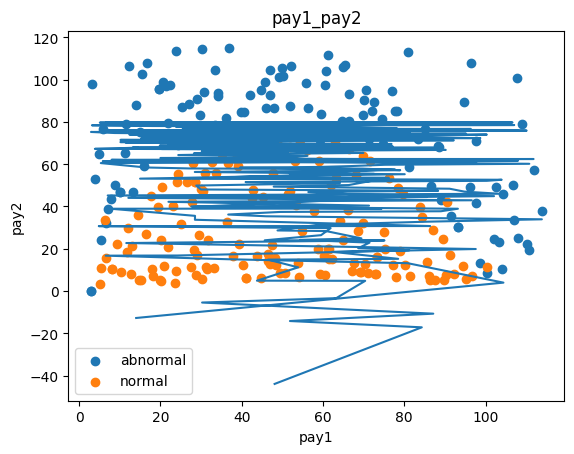

In [25]:
fig4=plt.figure()
abnormal=plt.scatter(data.loc[:,'pay1'][mask],data.loc[:,'pay2'][mask])
normal=plt.scatter(data.loc[:,'pay1'][~mask],data.loc[:,'pay2'][~mask])
plt.plot(X1,X2_new_2)
plt.title('pay1_pay2')
plt.xlabel('pay1')
plt.ylabel('pay2')
plt.legend((abnormal,normal),('abnormal','normal'))
plt.show()

商业异常消费数据预测实战summary：
1、通过搭建线性边界逻辑回归模型，实现了消费者消费行为的分类预测；
2、结合准确率指标与可视化分类结果，发现线性边界分类效果不是很理想；
3、引入了二次项数据，完成二阶多项式边界的逻辑回归预测，实现分类准确率从0.8提高到0.97，模型表现提升明显
3、调用predict方法对新的样本做了预测，发现其为正常消费；
4、实现了二阶分类边界的可视化，观察其发现该边界确实可以很好的区分两类样本从而达到很好的分类效果。
参考链接：
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html